In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
#import seaborn as sns

In [2]:
#Read the dataset 
cars = pd.read_csv("ToyotaCorolla.csv")
cars.head() 

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
#Displaying only columns name
cars.columns.to_flat_index() 

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
#dropping useless column 
cars1=cars.drop(columns=['Id', 'Model', 'Mfg_Month', 'Mfg_Year','Fuel_Type',  'Met_Color', 'Color', 'Automatic', 
       'Cylinders', 'Mfr_Guarantee','BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player','Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim','Radio_cassette', 'Tow_Bar'],axis=1)
cars1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
#check missing values
cars1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
cars1.corr()           #correlation should be in between 0 to 1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [8]:
# #sns.set_style(style='darkgrid')
# sns.pairplot(cars1)

# Model 1

In [9]:
# Using all X

In [10]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=cars1).fit()   #building model
model1.summary()                                                                               #summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:15:04   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting influence plot with and without cooks distance  using model1 & cars1

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model1.get_influence()                #for record 0 cook val 4.437
(c, _) = model_influence.cooks_distance

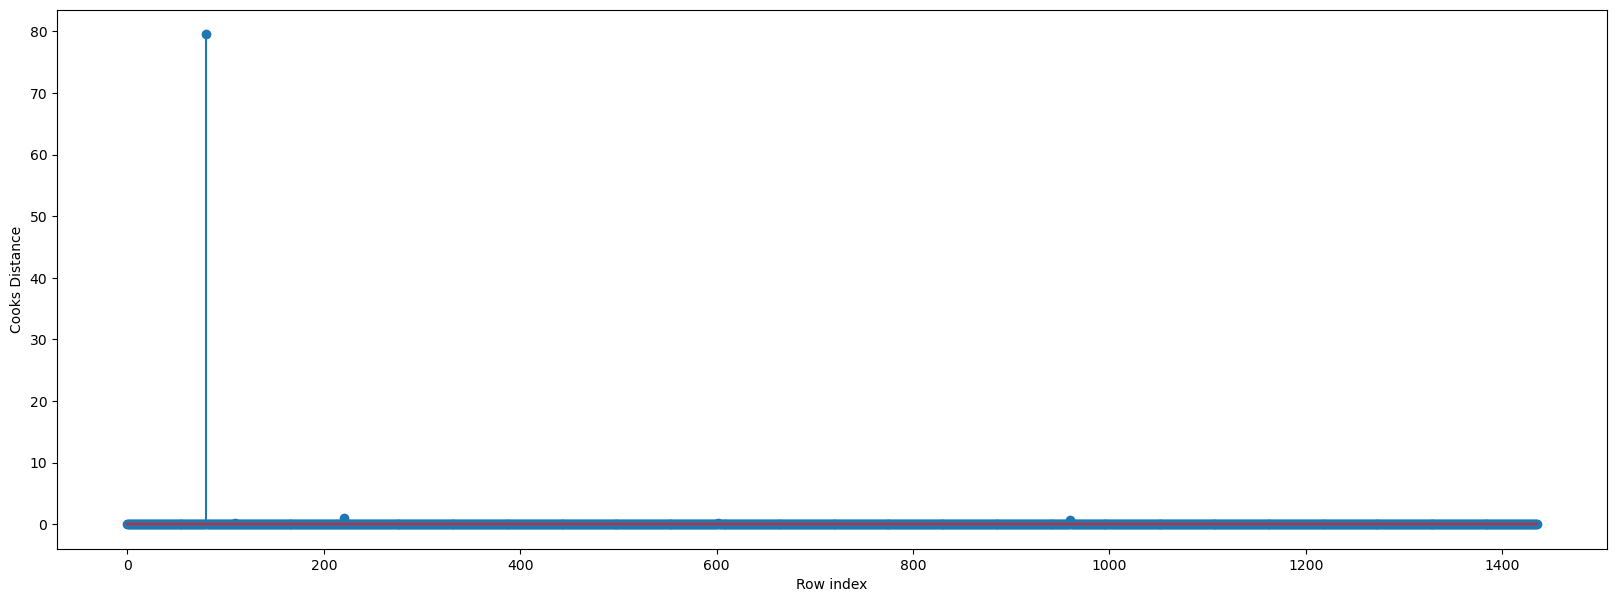

In [12]:
fig=plt.subplots(figsize=(20,7))          ##width=20 height=7 @fig
plt.stem(np.arange(len(cars1)), np.round(c,3)) #rounds array val to 3decimals
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

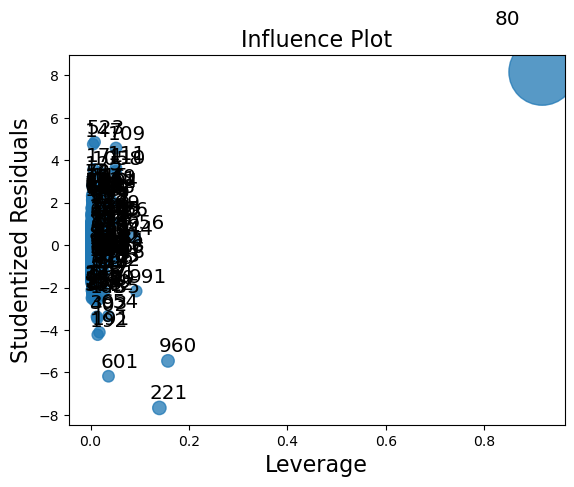

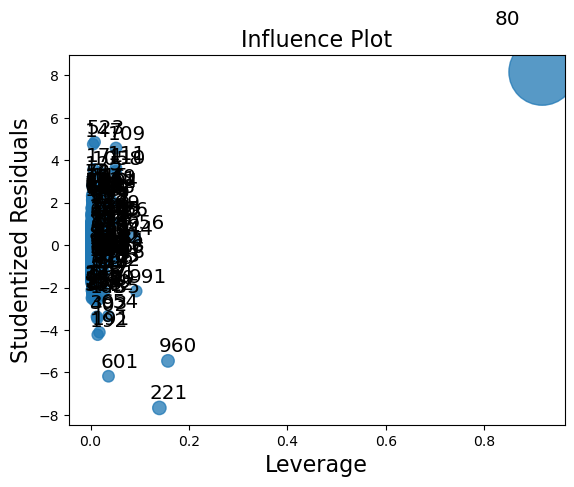

In [13]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)         #80 drop

# Improving model

In [14]:
#display 80 index
cars1[cars1.index.isin([80])] 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [15]:
#Dropping index 80
cars2=cars1.drop([80], axis=0)
cars2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Model 2

In [16]:
# Using all X Except Doors

In [17]:
model2=smf.ols('Price~Age_08_04+KM+HP+Gears+cc+Quarterly_Tax+Weight',data=cars2).fit()   #model by removing Doors P>|t|>0.5
model2.summary()                                                                               #summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:15:11   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting influence plot with and without cooks distance using model2 & cars2

In [18]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()                #for record 0 cook val 4.437
(c, _) = model_influence.cooks_distance

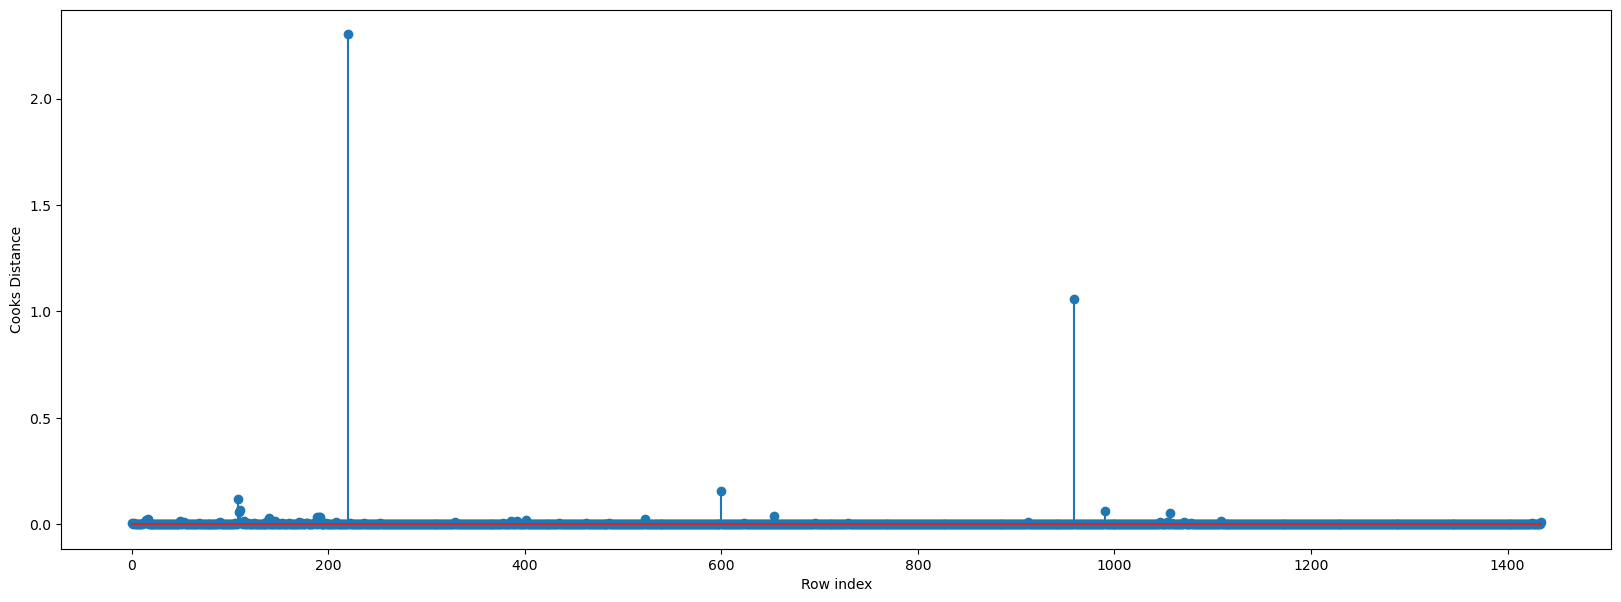

In [19]:
fig=plt.subplots(figsize=(20,7))          ##width=20 height=7 @fig
plt.stem(np.arange(len(cars2)), np.round(c,3)) #rounds array val to 3decimals
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

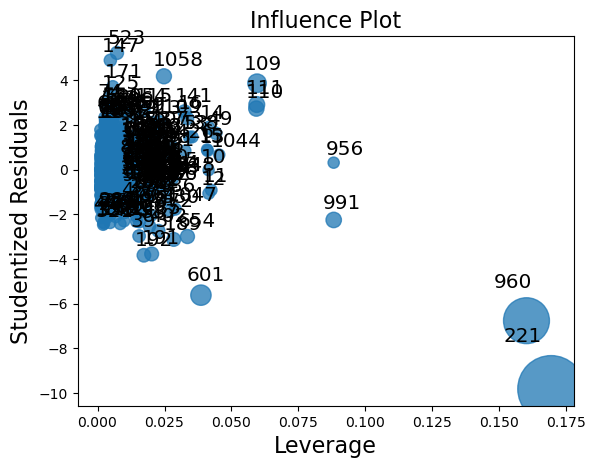

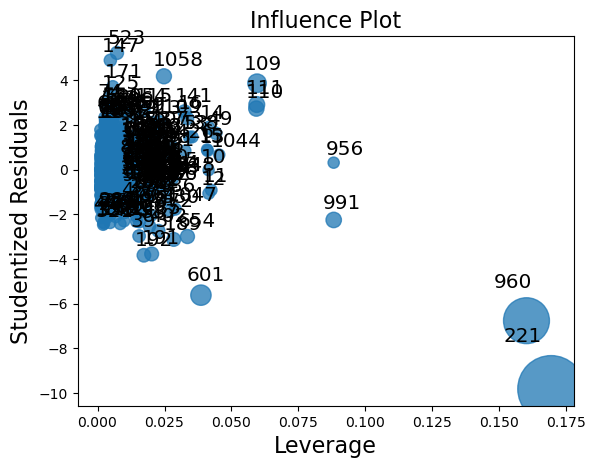

In [20]:
import statsmodels.api as sm
sm.graphics.influence_plot(model2)         #221,960 drop

# Improving model

In [21]:
#display 221,960 index
cars2[cars2.index.isin([221,960])] 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [22]:
#Dropping index 221,960
cars3=cars2.drop([221,960], axis=0)
cars3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Model 3

In [23]:
model3=smf.ols('Price~Age_08_04+KM+HP+Gears+cc+Quarterly_Tax+Weight',data=cars3).fit()   #model by removing Doors P>|t|>0.5
model3.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:15:22   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting influence plot with and without cooks distance using model3 & cars3

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model3.get_influence()                #for record 0 cook val 4.437
(c, _) = model_influence.cooks_distance

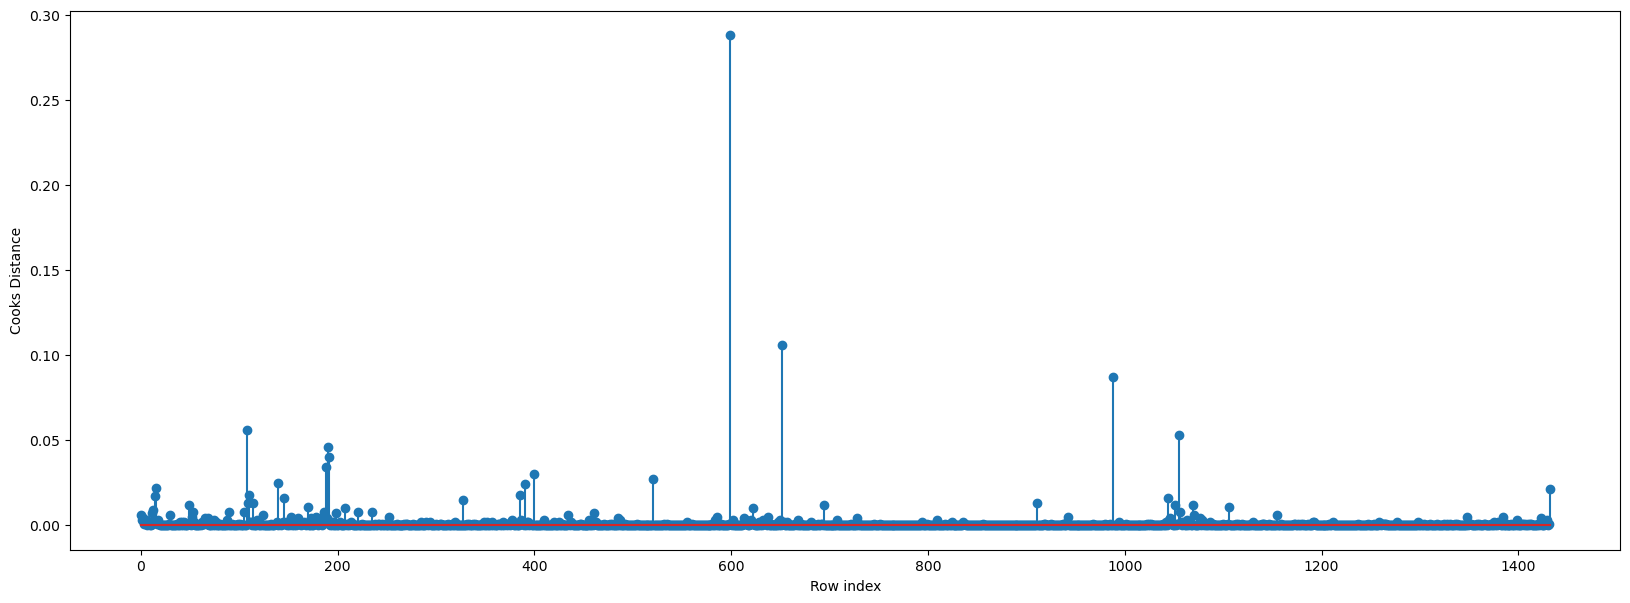

In [25]:
fig=plt.subplots(figsize=(20,7))          ##width=20 height=7 @fig
plt.stem(np.arange(len(cars3)), np.round(c,3)) #rounds array val to 3decimals
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:15:22   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretation

In [27]:
# p-value < 0.05              Thus the model is accepted

# coefficient = -112.4015    if the Age increased by 1, the predicted value of Price will decrease by -112.4015

# Adj. R-sqared = 0.884      The model explains 88.4% of the variance in dependent variable